In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("/data/kddcup.data", header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      in

In [6]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [7]:
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
df.Category.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Category, dtype: int64

In [14]:
import numpy as np
from sklearn import *

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [11]:
y = np.where(df.Category == "normal.",0, 1)

In [13]:
X = df.select_dtypes(include=[np.float64, np.int64])

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(learning_rate="invscaling"
                                       , eta0=0.001
                                       , random_state=1)) 
])


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9952644723142774

In [17]:
%%time 
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9952644723142774
CPU times: user 13.9 s, sys: 9.31 s, total: 23.2 s
Wall time: 24.6 s


In [19]:
pd.Series(y_train).value_counts()/len(y_train)

1    0.801277
0    0.198723
dtype: float64

In [20]:
X.shape

(4898431, 38)

In [21]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
%%time 
pca = decomposition.PCA(random_state=1)
pca.fit(X_train_std)

CPU times: user 17.8 s, sys: 7.18 s, total: 25 s
Wall time: 20.8 s


In [28]:
%matplotlib inline 

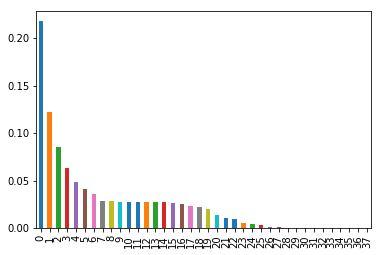

In [29]:
pd.Series(pca.explained_variance_ratio_).plot.bar()

In [31]:
res = pd.DataFrame({"retention": pca.explained_variance_ratio_, 
                    "cumvariance": np.cumsum(pca.explained_variance_ratio_)})

res.head()

,cumvariance,retention
0,0.217936,0.217936
1,0.340078,0.122142
2,0.425167,0.085089
3,0.487940,0.062773
4,0.536693,0.048753


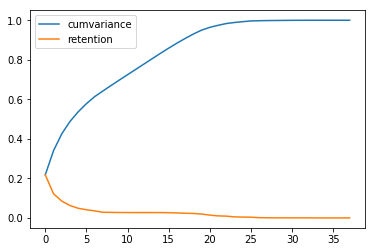

In [32]:
res.plot()

In [34]:
res[res.cumvariance > 0.99].iloc[:3, ]

,cumvariance,retention
24,0.992779,0.004132
25,0.996451,0.003671
26,0.997644,0.001193


In [35]:
pca = decomposition.PCA(n_components=24, random_state=1)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [37]:
pd.DataFramerameFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.071353,7.294841,-2.800803,0.034600,-0.008449,1.098055,-0.242303,-0.753395,-0.045330,0.150549,...,0.045075,0.477348,0.197469,-0.407885,-0.309479,-0.321091,0.002897,-0.032722,0.252533,-0.060617
1,-0.351425,0.511972,2.564446,-0.151787,-0.136793,-0.042824,0.012832,-1.444416,0.548849,0.158754,...,-0.020208,1.099919,0.293408,-0.563356,0.015590,0.507488,-0.029942,-0.131735,1.387940,0.023904
2,-2.007864,-0.385556,-0.761697,0.033540,0.034385,0.042652,-0.010736,0.089610,-0.037296,-0.011150,...,-0.001648,-0.061686,-0.018883,0.048048,0.022641,-0.031683,-0.002111,0.027088,-0.048664,-0.001822
3,-1.870289,-0.322807,-0.578693,0.023365,0.022530,0.014409,-0.003604,0.033972,-0.013604,-0.003147,...,-0.000718,-0.020367,-0.005137,0.007760,-0.002044,-0.001879,0.001429,-0.028057,0.046686,0.002427
4,-2.007864,-0.385556,-0.761697,0.033540,0.034385,0.042652,-0.010736,0.089610,-0.037296,-0.011150,...,-0.001648,-0.061686,-0.018883,0.048048,0.022641,-0.031683,-0.002111,0.027088,-0.048664,-0.001822


In [38]:
%%time 
pipe.fit(X_train_pca, y_train)
y_train_pred = pipe.predict(X_train_pca)
y_test_pred = pipe.predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_test_pred))

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9861207324790919
CPU times: user 9.19 s, sys: 4.22 s, total: 13.4 s
Wall time: 14.5 s


In [40]:
pca2 = decomposition.PCA(n_components=2, random_state=1)
pca2.fit(X_train_std)
X_train_pca2 = pca2.transform(X_train_std)
X_test_pca2 = pca2.transform(X_test_std)

In [42]:
import matplotlib.pyplot as plt

In [ ]:
colors = np.where(y_train == 1, "red", "blue")
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], alpha = 0.4, color = colors)